# About the data (Description of attributes)

This dataset contains 119390 observations for a City Hotel and a Resort Hotel. Each observation represents a hotel booking between the 1st of July 2015 and 31st of August 2017, including booking that effectively arrived and booking that were canceled.

Contents:

Since this is hotel real data, all data elements pertaining hotel or costumer identification were deleted. Four Columns, 'name', 'email', 'phone number' and 'credit_card' have been artificially created and added to the dataset.

Column Summary:

Hotel: The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city hotel.

is_canceled: Value indicating if the booking was canceled (1) or not (0).

lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

arrival_date_year: Year of arrival date

arrival_date_month: Month of arrival date with 12 categories: “January” to “December”

arrival_date_week_number: Week number of the arrival date

arrival_date_day_of_month: Day of the month of the arrival date

stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by counting the number of week nights

adults: Number of adults



# Problem statement

In the year 2015 to 2017, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.



# Assumptions

1.No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.

2.The information is still current and can be used to analyze a hotel's possible plans inan efficient manner.

3.There are no unanticipated negatives to the hotel employing any advised technique.

4.The hotels are not currently using any of the suggested solutions.

5.The biggest factor affecting the effectiveness of earning income is booking cancellations.

6.Cancellations result in vacant rooms for the booked length of time.

7.Clients make hotel reservations the same year they make cancellations.

## Research question


1.What are the variables that affect hotel reservation cancellations?

2.How can we make hotel reservations cancellations better?

3.How will hotels be assisted in making pricing and promotional decisions?


# Hypothesis


1.More cancellations occur when prices are higher.

2.When there is a longer waiting list, customers tend to cancel more frequently.

3.The majority of clients are coming from offline travel agents to make their reservations.


### Importing Liabraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


### Import Dataset

In [2]:
df = pd.read_csv('/content/hotel_booking.csv')

### Exploratory Data Analysis and Data Cleaning

In [3]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


In [4]:
df.shape

(29652, 36)

Converting data type of target variable reservation_status_date to date time.


In [5]:
df.tail(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
29642,Resort Hotel,0,90,2016,October,44,29,2,2,1,...,Transient,49.90,1,1,Check-Out,2016-11-02,Rachel Terry,Terry.Rachel@att.com,597-536-7768,************3405
29643,Resort Hotel,0,0,2016,November,45,1,0,1,2,...,Transient,55.00,1,0,Check-Out,2016-11-02,Joshua Cannon,Joshua_Cannon61@outlook.com,584-795-5650,************9829
29644,Resort Hotel,0,18,2016,November,45,1,0,1,2,...,Transient-Party,66.00,1,1,Check-Out,2016-11-02,Jeffrey Garcia,Jeffrey_G@mail.com,469-155-6297,************9035
29645,Resort Hotel,0,46,2016,October,45,30,2,1,2,...,Transient,53.41,0,1,Check-Out,2016-11-02,James Bell,Bell_James@xfinity.com,176-137-5016,************2511
29646,Resort Hotel,0,18,2016,November,45,1,0,1,2,...,Transient-Party,80.00,0,1,Check-Out,2016-11-02,Erika Moran,Erika.M@zoho.com,620-286-6344,************2885
29647,Resort Hotel,0,72,2016,October,45,31,1,1,2,...,Transient,43.80,1,1,Check-Out,2016-11-02,Christopher Howell,CHowell@xfinity.com,482-450-8983,************4209
29648,Resort Hotel,0,94,2016,October,44,28,2,3,2,...,Transient,57.92,0,2,Check-Out,2016-11-02,Katherine Cox,KatherineCox@gmail.com,271-149-1984,************7935
29649,Resort Hotel,0,2,2016,October,45,31,1,1,2,...,Transient,62.50,0,0,Check-Out,2016-11-02,Michael Arnold,Michael.Arnold36@comcast.net,966-850-9215,************9039
29650,Resort Hotel,0,43,2016,October,44,29,2,2,2,...,Transient,79.00,0,0,Check-Out,2016-11-02,Vanessa Wheeler,Vanessa.Wheeler@zoho.com,648-681-5180,************4492
29651,Resort Hotel,0,7,2016,October,45,31,1,1,2,...,Transient,62.50,0,1,Check-Out,2016-11-02,Christine Wilson,Chr,NaN,NaN


In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29652 entries, 0 to 29651
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           29652 non-null  object 
 1   is_canceled                     29652 non-null  int64  
 2   lead_time                       29652 non-null  int64  
 3   arrival_date_year               29652 non-null  int64  
 4   arrival_date_month              29652 non-null  object 
 5   arrival_date_week_number        29652 non-null  int64  
 6   arrival_date_day_of_month       29652 non-null  int64  
 7   stays_in_weekend_nights         29652 non-null  int64  
 8   stays_in_week_nights            29652 non-null  int64  
 9   adults                          29652 non-null  int64  
 10  children                        29652 non-null  float64
 11  babies                          29652 non-null  int64  
 12  meal                            

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29652 entries, 0 to 29651
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           29652 non-null  object        
 1   is_canceled                     29652 non-null  int64         
 2   lead_time                       29652 non-null  int64         
 3   arrival_date_year               29652 non-null  int64         
 4   arrival_date_month              29652 non-null  object        
 5   arrival_date_week_number        29652 non-null  int64         
 6   arrival_date_day_of_month       29652 non-null  int64         
 7   stays_in_weekend_nights         29652 non-null  int64         
 8   stays_in_week_nights            29652 non-null  int64         
 9   adults                          29652 non-null  int64         
 10  children                        29652 non-null  float64       
 11  ba

In [10]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,29652,29652,29652,29191,29652,29652,29652,29652,29652,29652,29652,29652,29652,29651,29651
unique,1,12,5,113,6,4,10,11,3,4,3,25534,29417,29651,8627
top,Resort Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Robert Smith,JBrown@protonmail.com,648-681-5180,************1504
freq,29652,3840,22254,14485,12877,21324,17613,13031,27800,22812,18539,14,4,1,13


In [11]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SG

In [12]:
df.drop(['agent', 'company'], axis = 1, inplace=True)
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190
mean,0.379171,98.860534,2015.879479,28.406132,15.841453,1.207297,3.168448,1.883453,0.133196,0.013498,0.049503,0.138061,0.161871,0.263412,0.603426,95.269362,0.122062,0.563001,2016-04-30 23:30:21.089414400
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,13.000000,2015.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,0.000000,0.000000,2015-11-29 00:00:00
50%,0.000000,66.500000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.000000,2016-04-20 00:00:00
75%,1.000000,164.000000,2016.000000,39.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2016-09-15 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,8.000000,5.000000,2017-09-09 00:00:00
std,0.485189,99.583448,0.653093,13.333427,8.868610,1.135040,2.422096,0.765881,0.456401,0.116577,0.216920,1.561967,1.070859,0.695754,7.963743,60.522360,0.334814,0.781471,NaN


<Axes: >

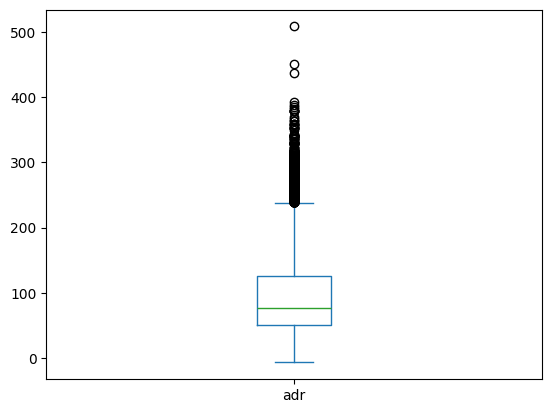

In [15]:
df['adr'].plot(kind = 'box')

Spotted extreme outlier in adr (average daily rate)



Removing outlier


In [16]:
df = df[df['adr']<5000]

In [17]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190.000000,29190
mean,0.379171,98.860534,2015.879479,28.406132,15.841453,1.207297,3.168448,1.883453,0.133196,0.013498,0.049503,0.138061,0.161871,0.263412,0.603426,95.269362,0.122062,0.563001,2016-04-30 23:30:21.089414400
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-11-18 00:00:00
25%,0.000000,13.000000,2015.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,0.000000,0.000000,2015-11-29 00:00:00
50%,0.000000,66.500000,2016.000000,30.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76.500000,0.000000,0.000000,2016-04-20 00:00:00
75%,1.000000,164.000000,2016.000000,39.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2016-09-15 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,150.000000,508.000000,8.000000,5.000000,2017-09-09 00:00:00
std,0.485189,99.583448,0.653093,13.333427,8.868610,1.135040,2.422096,0.765881,0.456401,0.116577,0.216920,1.561967,1.070859,0.695754,7.963743,60.522360,0.334814,0.781471,NaN


### Data Analysis and Visualizations

is_canceled
0    0.620829
1    0.379171
Name: proportion, dtype: float64


<BarContainer object of 2 artists>

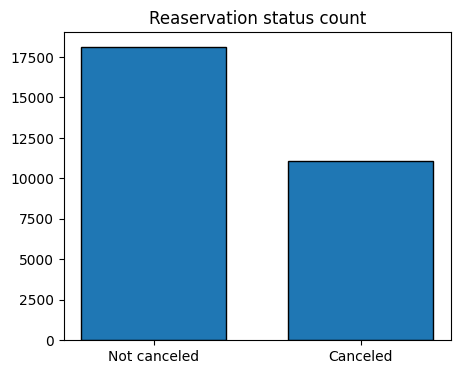

In [18]:
cancelled_perc = df['is_canceled'].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))
plt.title('Reaservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor = 'k', width = 0.7)

Finding cancellation status with respect to hotels


Text(0, 0.5, 'number of reservations')

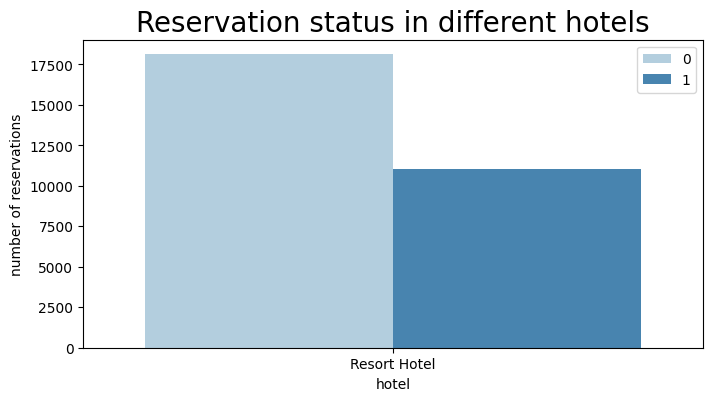

In [19]:
plt.figure(figsize = (8,4))
ax1 = sns.countplot(x = 'hotel' , hue = 'is_canceled' , data= df , palette = 'Blues')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))
plt.title('Reservation status in different hotels', size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

In [20]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)


,proportion
is_canceled,
0,0.620829
1,0.379171


In [21]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,


In [22]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

Visualizing Average daily rate (adr) of City and Resort hotels.

The Average Daily Rate (ADR) is a key performance indicator that represents the average room rate that a guest pays per room per day. It is calculated by dividing the total room revenue by the total number of rooms sold over a specific period.

<function matplotlib.pyplot.show(close=None, block=None)>

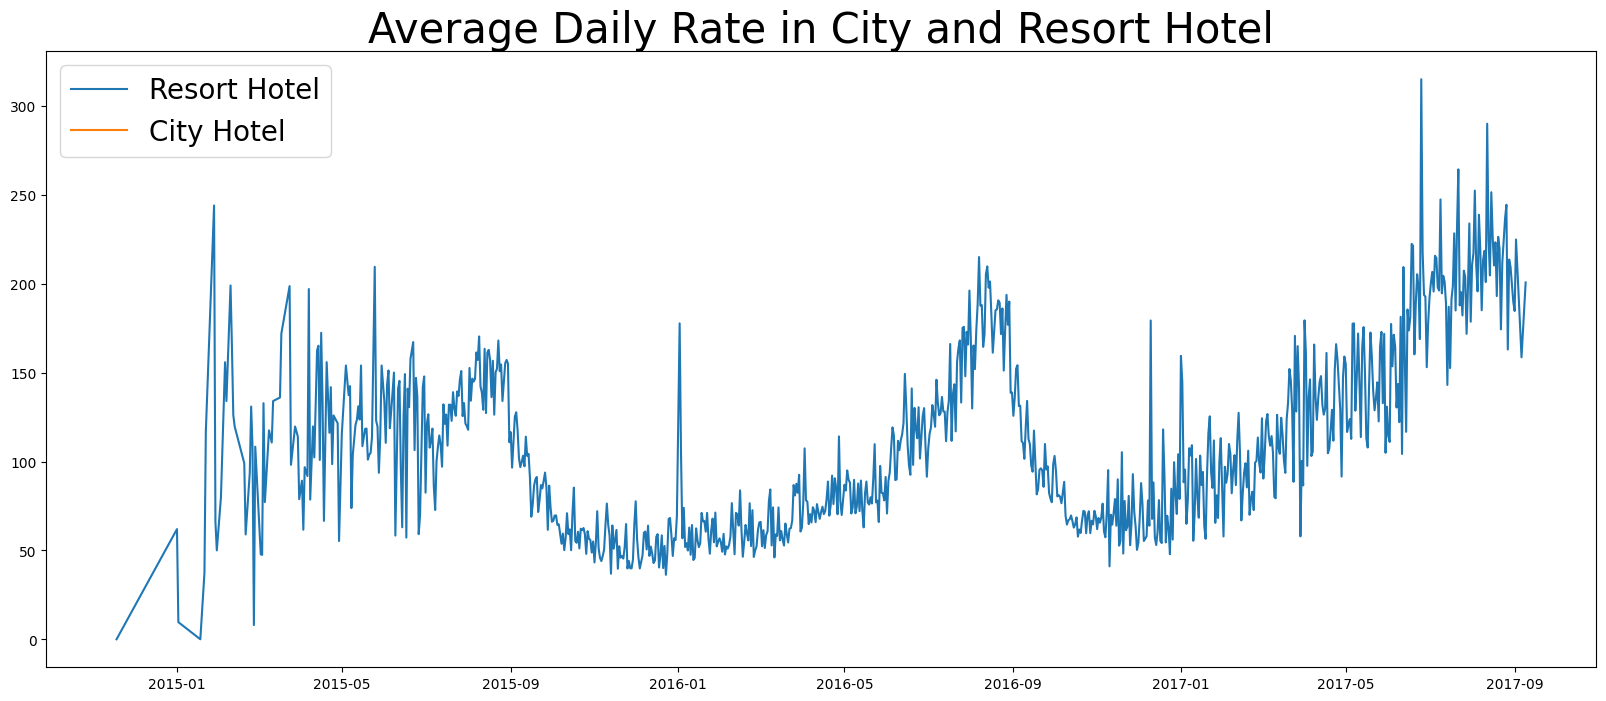

In [23]:
plt.figure(figsize = (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show

ADR of Resort is much higher thnan City Hotels in some periods.

High prices might be cause for cancellations for Resorts.


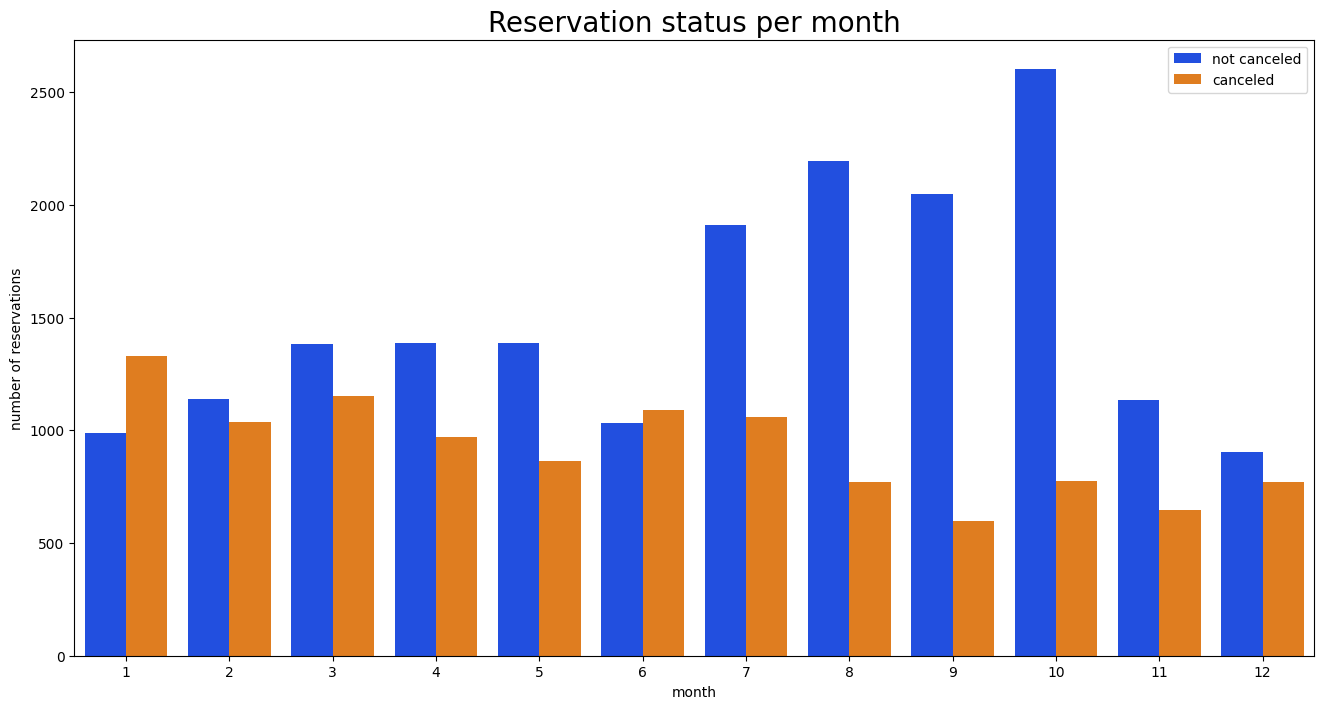

In [24]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legent_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor= (2,2))
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

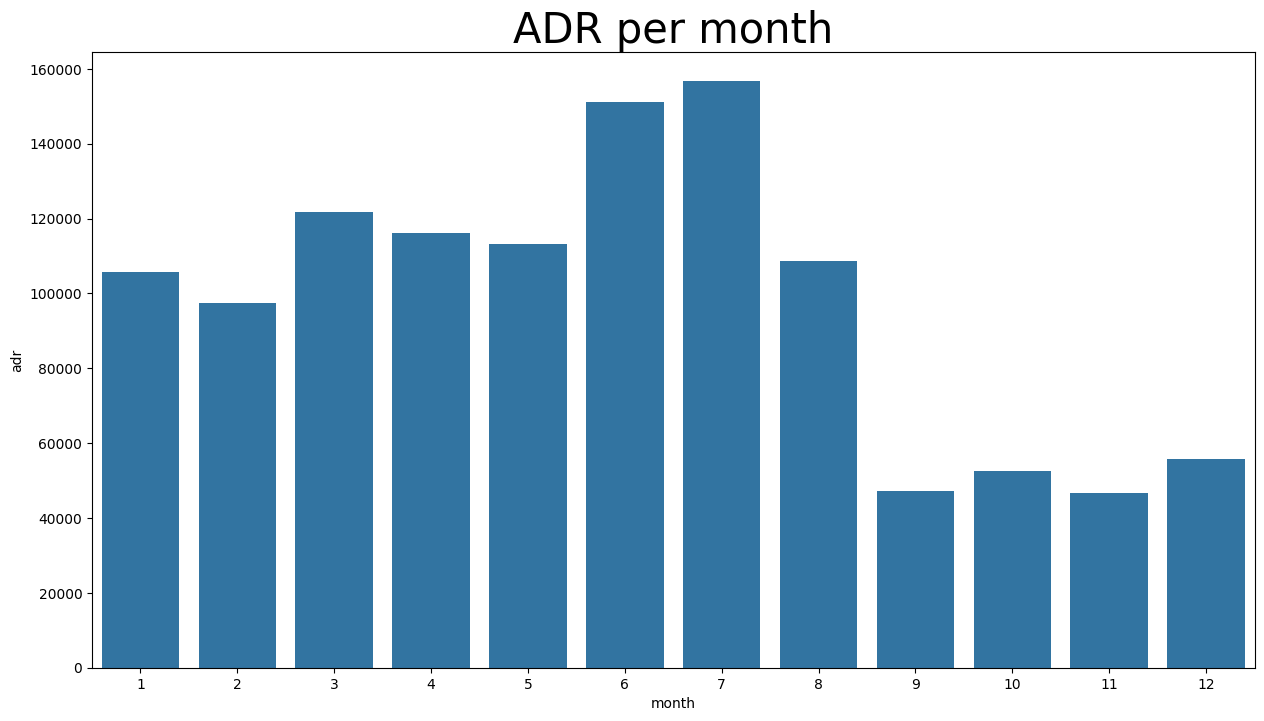

In [25]:
plt.figure(figsize = (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot(x='month',y= 'adr', data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())
plt.show()

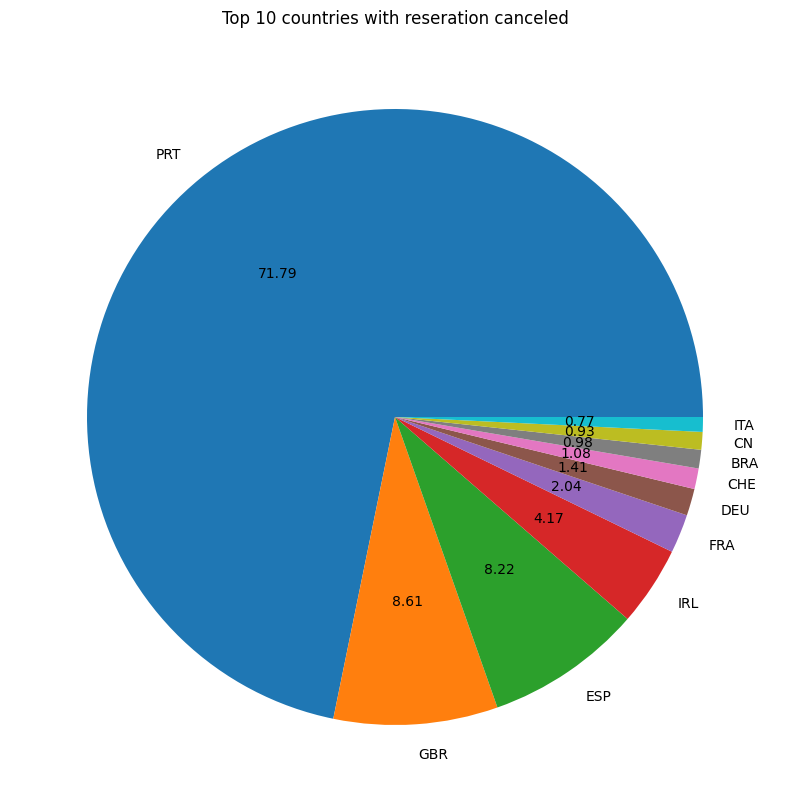

In [26]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize = (10,10))
plt.title('Top 10 countries with reseration canceled')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

In [27]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,12803
Offline TA/TO,5554
Groups,4657
Direct,4364
Corporate,1687
Complementary,125


In [28]:
df['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.438609
Offline TA/TO,0.190271
Groups,0.159541
Direct,0.149503
Corporate,0.057794
Complementary,0.004282


In [29]:
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.564510
Groups,0.223527
Offline TA/TO,0.101012
Direct,0.077701
Corporate,0.030267
Complementary,0.002982


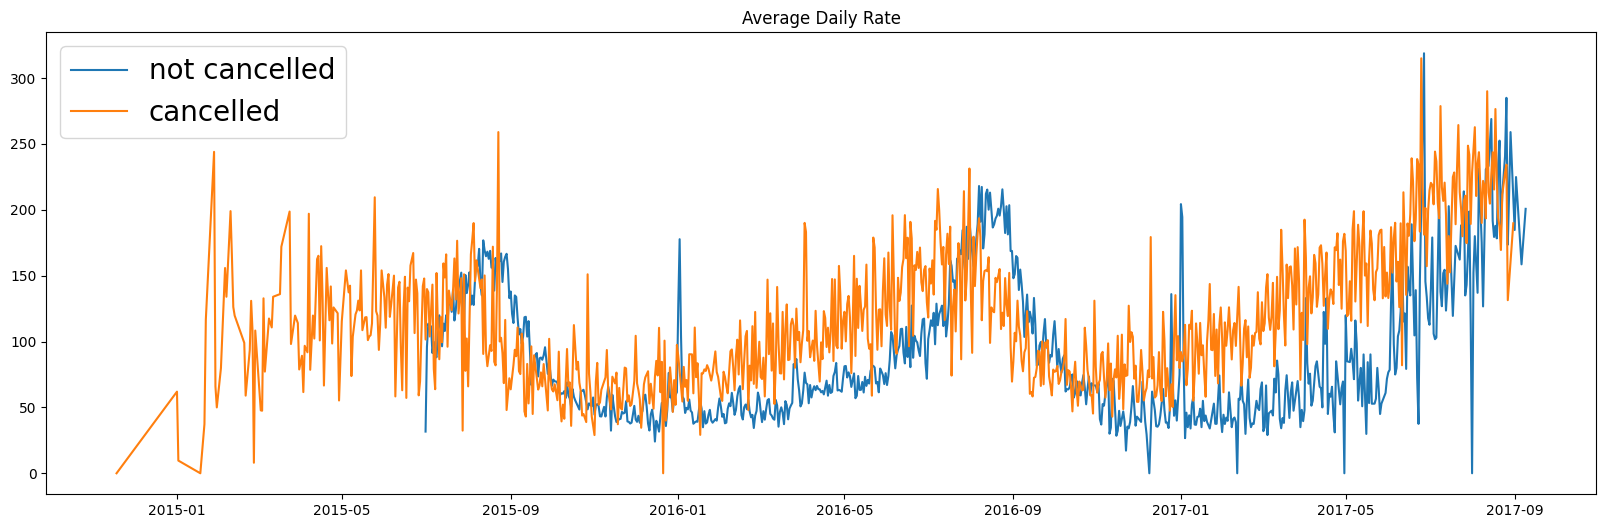

In [30]:
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace= True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (20,6))
plt.title('Average Daily Rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)

In [31]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016')& (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016')& (not_cancelled_df_adr['reservation_status_date']<'2017-09')]


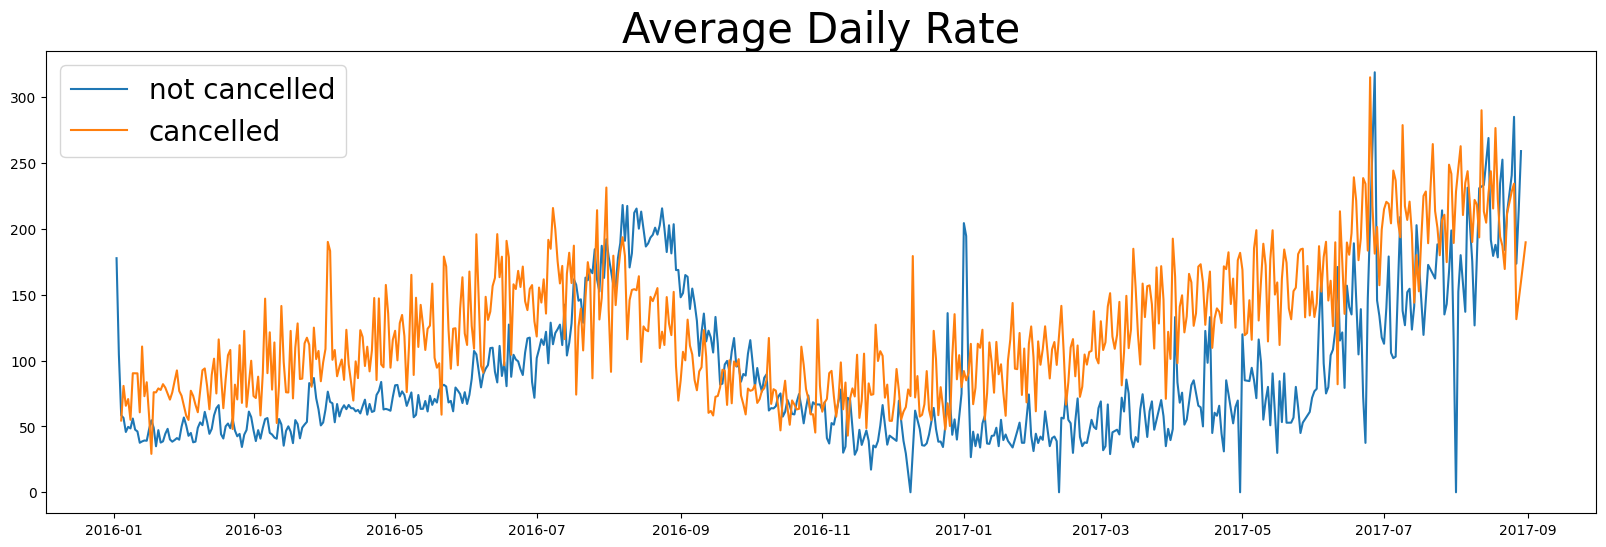

In [32]:
plt.figure(figsize = (20,6))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)

## Suggestion


Provide accurate photos of hotel to reduce cancellations.

Utilize a reliable online booking platform that allows guests to make reservations easily. Provide high-quality photos and detailed descriptions of properties.

Stay competitive with your pricing while maintaining the quality of the services. Offer promotions, discounts, and loyalty programs to attract repeat customers.

Encourage satisfied guests to leave positive reviews on platforms like TripAdvisor, Yelp, or Google Reviews.Respond to reviews, whether positive or negative, to show the commitment to customer satisfaction.

Use social media platforms to promote your hotel and engage with potential guests. Share high-quality images, updates, and special offers.
